In [1]:
import sys
sys.path.append("../vis/python")
from athena_read import vtk

import numpy as np
import matplotlib.pyplot as plt

In [2]:
x0, y0, z0, R0, tauc = 0.6, 0.8, 0.1, 0.2, 3 # copy from input file

In [3]:
import glob

def plot_phi_slice(phi_slice, I, plot_truth=False, n_ghost=2, vmin=0, vmax=1, **kwargs):
    for f in glob.glob('tau.block*.out1.00000.vtk'):
        r, th, phi, d = vtk(f)
        xf, zf = np.outer(np.sin(th), r), np.outer(np.cos(th), r)
        rc, thc, phic = .5*(r[1:]+r[:-1]), .5*(th[1:]+th[:-1]), .5*(phi[1:]+phi[:-1])
        xc = np.cos(phic)[:,None,None] * np.sin(thc)[:,None] * rc
        yc = np.sin(phic)[:,None,None] * np.sin(thc)[:,None] * rc
        zc = np.cos(thc)[:,None] * rc
        D = np.sqrt((xc-x0)**2 + (yc-y0)**2 + (zc-z0)**2)
        if plot_truth:
            tau = tauc*np.maximum(1-D/R0, 0.)
            if I==2:
                data = tau
            elif I==0:
                data = np.exp(-tau)
            elif I==1:
                data = np.exp(-1/tau)
        else:
            data = d['mom'][:,:,:,I]
        if (phi_slice>=phi[n_ghost]) and (phi_slice<=phi[-n_ghost]):
            iphi = np.argmin(np.abs(phi_slice-phi))
            plt.pcolormesh(xf, zf, data[iphi], vmin=vmin, vmax=vmax, **kwargs)
        if ((phi_slice+np.pi)>=phi[n_ghost]) and ((phi_slice+np.pi)<=phi[-n_ghost]):
            iphi = np.argmin(np.abs(phi_slice+np.pi-phi))
            plt.pcolormesh(-xf, zf, data[iphi], vmin=vmin, vmax=vmax, **kwargs)
    plt.gca().set_aspect('equal','box')
    return

def plot_th_slice(th_slice, I, plot_truth=False, n_ghost=2, vmin=0, vmax=1, **kwargs):
    for f in glob.glob('tau.block*.out1.00000.vtk'):
        r, th, phi, d = vtk(f)
        xf, yf = np.outer(np.cos(phi), r*np.sin(th_slice)), np.outer(np.sin(phi), r*np.sin(th_slice))
        rc, thc, phic = .5*(r[1:]+r[:-1]), .5*(th[1:]+th[:-1]), .5*(phi[1:]+phi[:-1])
        xc = np.cos(phic)[:,None,None] * np.sin(thc)[:,None] * rc
        yc = np.sin(phic)[:,None,None] * np.sin(thc)[:,None] * rc
        zc = np.cos(thc)[:,None] * rc
        D = np.sqrt((xc-x0)**2 + (yc-y0)**2 + (zc-z0)**2)
        if plot_truth:
            tau = tauc*np.maximum(1-D/R0, 0.)
            if I==2:
                data = tau
            elif I==0:
                data = np.exp(-tau)
            elif I==1:
                data = np.exp(-1/tau)
        else:
            data = d['mom'][:,:,:,I]
        if (th_slice>=th[n_ghost]) and (th_slice<=th[-n_ghost]):
            ith = np.argmin(np.abs(th_slice-th))
            plt.pcolormesh(xf, yf, data[:,ith], vmin=vmin, vmax=vmax, **kwargs)
    plt.gca().set_aspect('equal','box')
    return

/var/folders/w3/86cy1mvn3t5_sxhyqdwmz6bm0000gq/T/ipykernel_32522/65187099.py:19: RuntimeWarning: divide by zero encountered in divide
  data = np.exp(-1/tau)
/var/folders/w3/86cy1mvn3t5_sxhyqdwmz6bm0000gq/T/ipykernel_32522/65187099.py:47: RuntimeWarning: divide by zero encountered in divide
  data = np.exp(-1/tau)


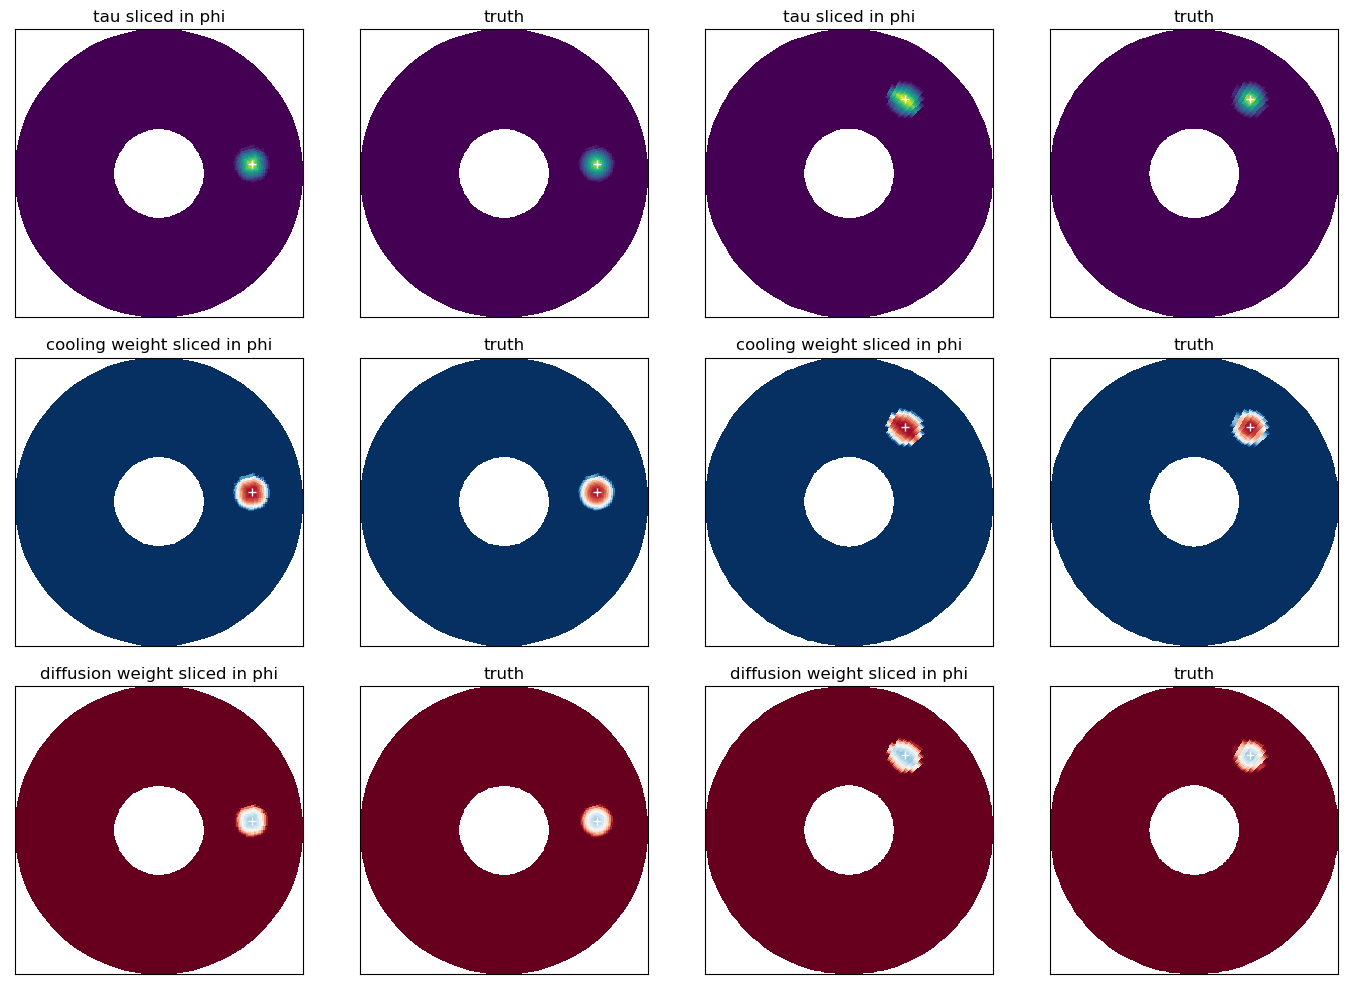

In [4]:
fig, ax = plt.subplots(3,4,figsize=(14,10))

I = 2

plt.sca(ax[0,0])
plot_phi_slice(np.arctan2(y0,x0), I, vmin=0, vmax=3)
plt.plot(np.sqrt(x0**2+y0**2),z0,'w+')
plt.title('tau sliced in phi')
plt.xticks([]); plt.yticks([])

plt.sca(ax[0,1])
plot_phi_slice(np.arctan2(y0,x0), I, plot_truth=True, vmin=0, vmax=3)
plt.plot(np.sqrt(x0**2+y0**2),z0,'w+')
plt.title('truth')
plt.xticks([]); plt.yticks([])

plt.sca(ax[0,2])
plot_th_slice(np.pi/2-np.arctan2(z0,np.sqrt(x0**2+y0**2)), I, vmin=0, vmax=3)
plt.plot(x0, y0,'w+')
plt.title('tau sliced in phi')
plt.xticks([]); plt.yticks([])

plt.sca(ax[0,3])
plot_th_slice(np.pi/2-np.arctan2(z0,np.sqrt(x0**2+y0**2)), I, plot_truth=True, vmin=0, vmax=3)
plt.plot(x0, y0,'w+')
plt.title('truth')
plt.xticks([]); plt.yticks([])

I = 0

plt.sca(ax[1,0])
plot_phi_slice(np.arctan2(y0,x0), I, vmin=0, vmax=1, cmap='RdBu')
plt.plot(np.sqrt(x0**2+y0**2),z0,'w+')
plt.title('cooling weight sliced in phi')
plt.xticks([]); plt.yticks([])

plt.sca(ax[1,1])
plot_phi_slice(np.arctan2(y0,x0), I, plot_truth=True, vmin=0, vmax=1, cmap='RdBu')
plt.plot(np.sqrt(x0**2+y0**2),z0,'w+')
plt.title('truth')
plt.xticks([]); plt.yticks([])

plt.sca(ax[1,2])
plot_th_slice(np.pi/2-np.arctan2(z0,np.sqrt(x0**2+y0**2)), I, vmin=0, vmax=1, cmap='RdBu')
plt.plot(x0, y0,'w+')
plt.title('cooling weight sliced in phi')
plt.xticks([]); plt.yticks([])

plt.sca(ax[1,3])
plot_th_slice(np.pi/2-np.arctan2(z0,np.sqrt(x0**2+y0**2)), I, plot_truth=True, vmin=0, vmax=1, cmap='RdBu')
plt.plot(x0, y0,'w+')
plt.title('truth')
plt.xticks([]); plt.yticks([])

I = 1

plt.sca(ax[2,0])
plot_phi_slice(np.arctan2(y0,x0), I, vmin=0, vmax=1, cmap='RdBu')
plt.plot(np.sqrt(x0**2+y0**2),z0,'w+')
plt.title('diffusion weight sliced in phi')
plt.xticks([]); plt.yticks([])

plt.sca(ax[2,1])
plot_phi_slice(np.arctan2(y0,x0), I, plot_truth=True, vmin=0, vmax=1, cmap='RdBu')
plt.plot(np.sqrt(x0**2+y0**2),z0,'w+')
plt.title('truth')
plt.xticks([]); plt.yticks([])

plt.sca(ax[2,2])
plot_th_slice(np.pi/2-np.arctan2(z0,np.sqrt(x0**2+y0**2)), I, vmin=0, vmax=1, cmap='RdBu')
plt.plot(x0, y0,'w+')
plt.title('diffusion weight sliced in phi')
plt.xticks([]); plt.yticks([])

plt.sca(ax[2,3])
plot_th_slice(np.pi/2-np.arctan2(z0,np.sqrt(x0**2+y0**2)), I, plot_truth=True, vmin=0, vmax=1, cmap='RdBu')
plt.plot(x0, y0,'w+')
plt.title('truth')
plt.xticks([]); plt.yticks([])

plt.tight_layout()

### There is still some artifact; this is reasonable since the pseudo-ray-tracing optical depth estimate is inexact.